In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from cycler import cycler
import os

%matplotlib inline

pd.set_option('display.max_colwidth', 50)

In [55]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial Narrow',
    'font.weight' : 'medium',
    'axes.titleweight' : 'heavy',
    
    'axes.titlesize' : 'large',
    
    "figure.facecolor": "#FFFFFF",
    "axes.facecolor": "#FFFFFF",
    "axes.grid" : True,
    "axes.grid.axis" : "y",
    "grid.color"    : "#41c1f4",
    "grid.linewidth": 1,
    
    "axes.spines.left" : False,
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    
    "ytick.major.size": 0,     
    "ytick.minor.size": 0,
    
    "xtick.direction" : "in",
    "xtick.major.size" : 5,
    "xtick.color"      : "#191919",
    "xtick.major.pad"      : 4,      # distance to major tick label in points
    "xtick.minor.pad"      : 3.9,      # distance to the minor tick label in point
    
    "axes.edgecolor"    :"#191919",
    "axes.prop_cycle" : plt.cycler('color', ['#518595', '#009CD7', '#72D1F6', '#108F85','#F13E20', '#711300']),
    "axes.axisbelow" : True,
    
    "legend.loc": 'lower right'
                                   
    })



In [3]:
Healthcare_Violations = pd.read_csv('Healthcare_Violations_Cleaned.csv')

In [4]:
Violations_2016 = pd.read_csv('Violations_2016.csv')

In [5]:
Violations_2017 = pd.read_csv('Violations_2017.csv')

In [6]:
Top_2_Nursing_2016 = pd.read_csv('Top_2_Nursing_Home_Violations_2016.csv')

In [7]:
Top_2_Nursing_2017 = pd.read_csv('Top_2_Nursing_Home_Violations_2017.csv')

In [133]:
Violations_Years = Healthcare_Violations['Penalty_Year_Date_Time'].value_counts().reset_index()

Violations_Years = Violations_Years.drop(Violations_Years.index[[18]])

Violations_Years.rename(columns={'index' : 'Year' , 'Penalty_Year_Date_Time' : 'Violations'} , inplace=True)

In [134]:
Violations_Years.dtypes

Year          object
Violations     int64
dtype: object

In [136]:
Violations_Years

Year  Violations
0   2015-01-01         133
1   2016-01-01         108
2   2017-01-01          97
3   2013-01-01          82
4   2012-01-01          75
5   2010-01-01          73
6   2014-01-01          69
7   2011-01-01          60
8   2006-01-01          52
9   2009-01-01          44
10  2005-01-01          43
11  2004-01-01          42
12  2008-01-01          39
13  2007-01-01          36
14  2003-01-01          32
15  2002-01-01          27
16  2001-01-01          24
17  2000-01-01          18

In [10]:
Violations_Years['Year'] = pd.to_datetime(Violations_Years['Year'] , format= "%Y-%m-%d")


## Number of Healthcare Violations by Year

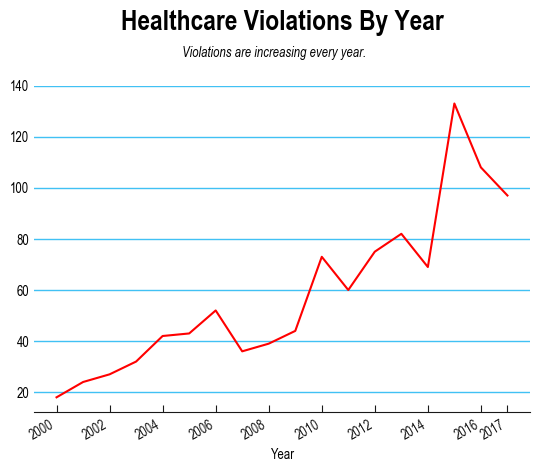

In [72]:



ax = Violations_Years.plot(x='Year' , y='Violations' , color='red')

ax.legend_.remove()


ax.set_xticks(['2000-01-01' , '2002-01-01'  , '2004-01-01'  , '2006-01-01'  , '2008-01-01'  , '2010-01-01' , '2012-01-01' , '2014-01-01' , '2016-01-01', '2017-01-01'])

ax.set_yticks([20 , 40 , 60 , 80 , 100 , 120 , 140])

ax.grid(b=None, which='major', axis='x')

ax.set_title("Healthcare Violations By Year", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Violations are increasing every year.", ha='center', fontsize=10, fontstyle='italic')



plt.savefig('Violations_Line_Graph.pdf')

plt.show()

## Violations over the last 17 years by type of violation

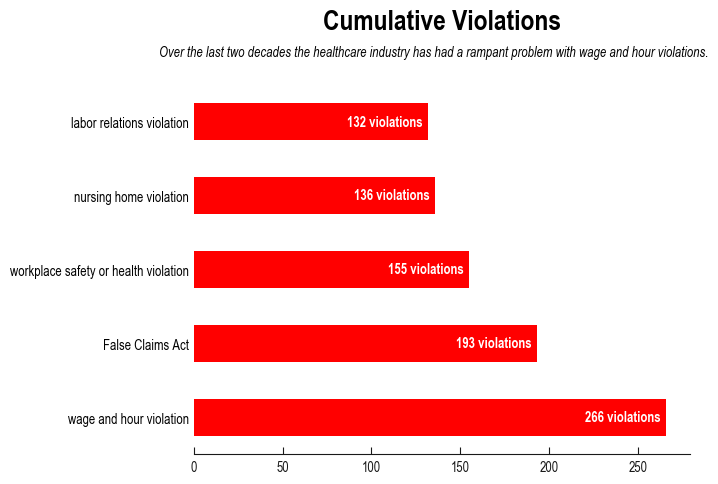

In [56]:
ax = Healthcare_Violations['Primary Offense'].value_counts().head(5).plot(kind='barh' , color='red')

ax.grid()

ax.set_title("Cumulative Violations", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Over the last two decades the healthcare industry has had a rampant problem with wage and hour violations.", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " violations"
    x_pos = bar.get_width() - 3
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')



plt.show()

## Top 5 Violations in 2016

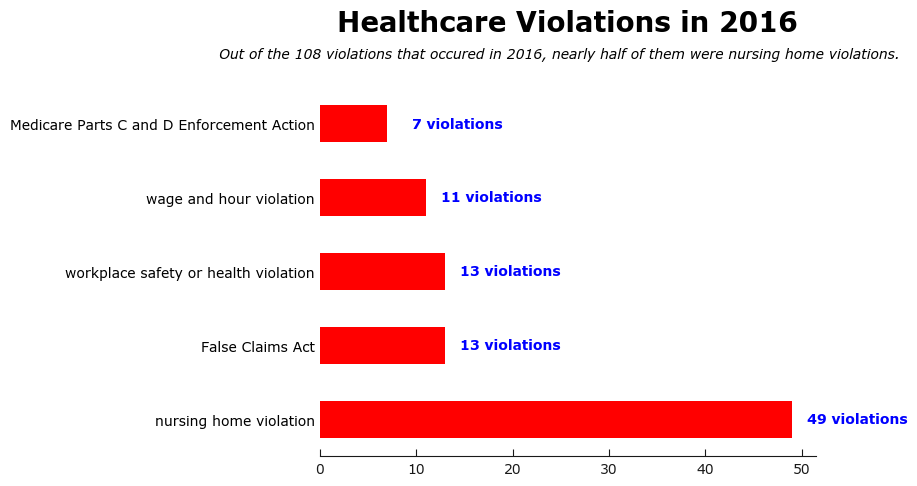

In [13]:
ax = Violations_2016['Primary Offense'].value_counts().head(5).plot(kind='barh' , color='red')


ax.grid()

ax.set_title("Healthcare Violations in 2016", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Out of the 108 violations that occured in 2016, nearly half of them were nursing home violations.", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " violations"
    x_pos = bar.get_width() + 12
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')


plt.savefig('Violations_2016.pdf')

plt.show()

## Top 5 Violations in 2017

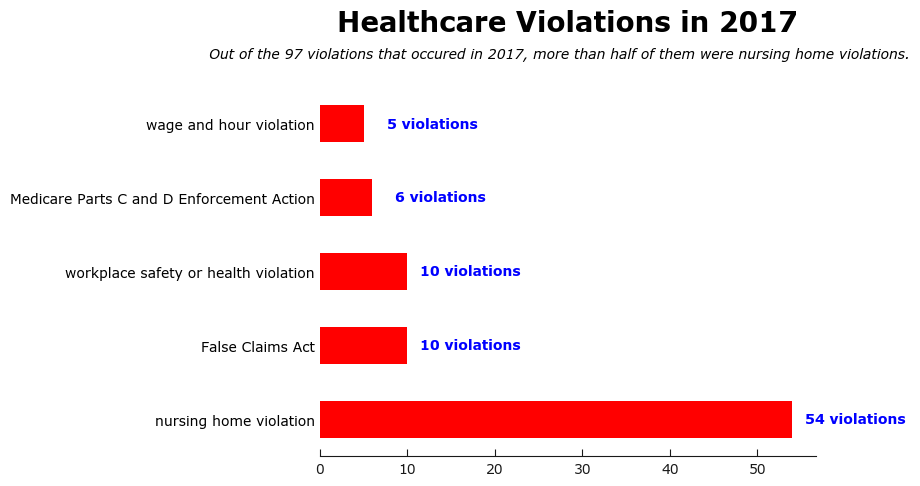

In [14]:
ax = Violations_2017['Primary Offense'].value_counts().head(5).plot(kind='barh' , color='red')


ax.grid()

ax.set_title("Healthcare Violations in 2017", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Out of the 97 violations that occured in 2017, more than half of them were nursing home violations.", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " violations"
    x_pos = bar.get_width() + 13
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')


plt.savefig('Violations_2016.pdf')

plt.show()

## TOP 5 OFFENDING COMPANIES IN 2017

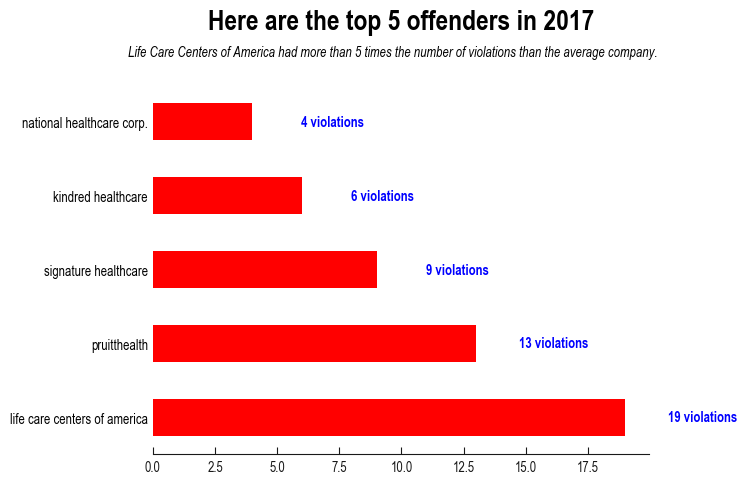

In [183]:
ax = Violations_2017['Parent Company'].value_counts().head(5).plot(kind='barh' , color='red')


ax.grid()

ax.set_title("Here are the top 5 offenders in 2017", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Life Care Centers of America had more than 5 times the number of violations than the average company.", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " violations"
    x_pos = bar.get_width() + 4.5
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')


plt.savefig('Biggest_Violators_2017.pdf')

plt.show()

## Top 5 Offending Companies in 2016

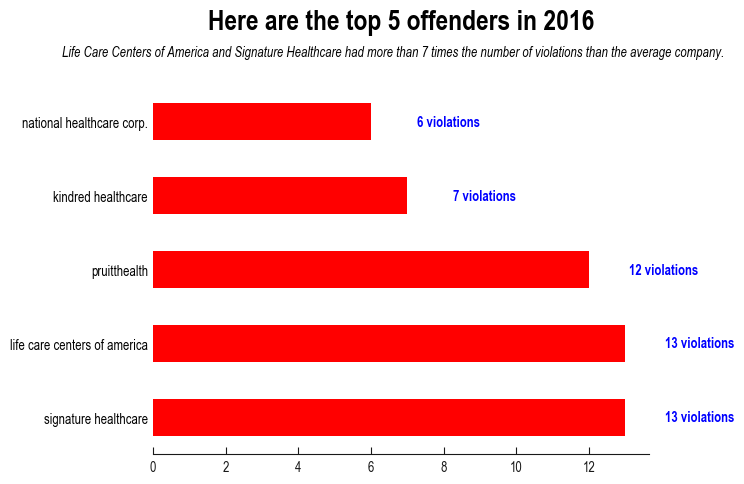

In [182]:
ax = Violations_2016['Parent Company'].value_counts().head(5).plot(kind='barh' , color='red')


ax.grid()

ax.set_title("Here are the top 5 offenders in 2016", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Life Care Centers of America and Signature Healthcare had more than 7 times the number of violations than the average company.", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width()))) + " violations"
    x_pos = bar.get_width() + 3
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')


plt.savefig('Biggest_Violators_2016.pdf')

plt.show()


In [185]:
Violations_2016['Parent Company'].value_counts().mean()

2.297872340425532

## Nursing Home Violations in 2016 and 2017

In [36]:
Nursing_Violations_2017 = Violations_2017[Violations_2017['Primary Offense'] == 'nursing home violation'].groupby('Parent Company')['Primary Offense'].value_counts().unstack()

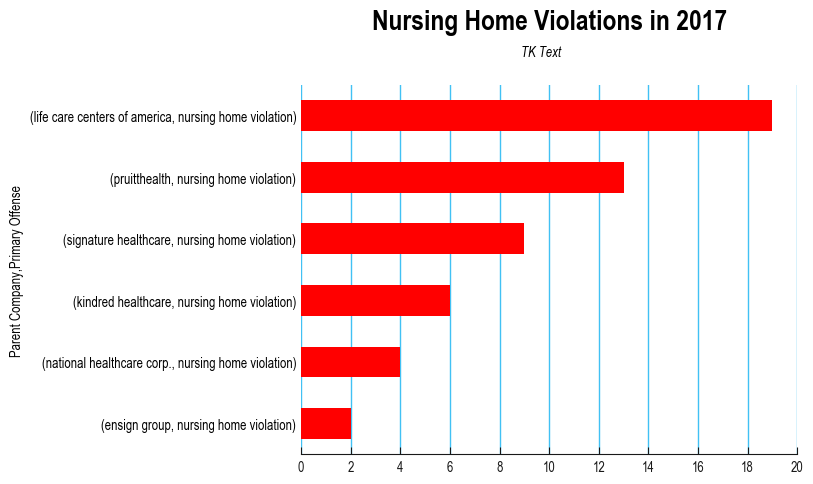

In [210]:


ax = Violations_2017[Violations_2017['Primary Offense'] == 'nursing home violation'].groupby('Parent Company')['Primary Offense'].value_counts().head(6).sort_values().plot(kind='barh' , color='red')

ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])



ax.grid(b=None, which='major', axis='y')



ax.set_title("Nursing Home Violations in 2017", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "TK Text", ha='center', fontsize=10, fontstyle='italic')


plt.savefig('Nursing_Home_Violations_2017.pdf')

plt.show()

In [77]:
Violations_2017[Violations_2017['Primary Offense'] == 'nursing home violation'].groupby('Parent Company')['Primary Offense'].value_counts()


Parent Company                Primary Offense       
ensign group                  nursing home violation     2
kindred healthcare            nursing home violation     6
life care centers of america  nursing home violation    19
national healthcare corp.     nursing home violation     4
pruitthealth                  nursing home violation    13
signature healthcare          nursing home violation     9
ssm health                    nursing home violation     1
Name: Primary Offense, dtype: int64

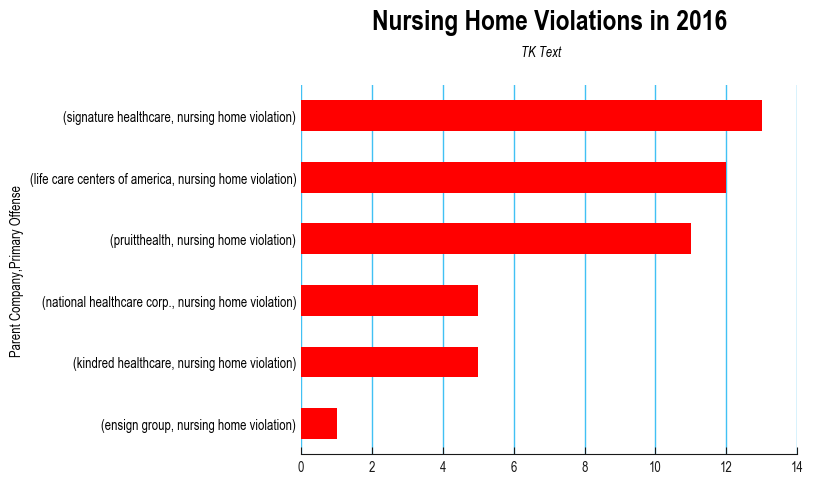

In [86]:


ax = Violations_2016[Violations_2016['Primary Offense'] == 'nursing home violation'].groupby('Parent Company')['Primary Offense'].value_counts().head(6).sort_values().plot(kind='barh' , color='red')

ax.set_xticks([0,2,4,6,8,10,12,14])

ax.grid(b=None, which='major', axis='y')


ax.set_title("Nursing Home Violations in 2016", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "TK Text", ha='center', fontsize=10, fontstyle='italic')


plt.savefig('Nursing_Home_Violations_2016.pdf')

plt.show()

In [63]:
Violations_2016[Violations_2016['Primary Offense'] == 'nursing home violation'].groupby('Parent Company')['Primary Offense'].value_counts()

Parent Company                Primary Offense       
ensign group                  nursing home violation     1
kindred healthcare            nursing home violation     5
life care centers of america  nursing home violation    12
national healthcare corp.     nursing home violation     5
pruitthealth                  nursing home violation    11
signature healthcare          nursing home violation    13
ssm health                    nursing home violation     1
upmc                          nursing home violation     1
Name: Primary Offense, dtype: int64

In [90]:
Nursing_Violations_2016 = Violations_2016[Violations_2016['Primary Offense'] == 'nursing home violation']

In [94]:
Nursing_2016_top_3 = Nursing_Violations_2016[(Nursing_Violations_2016['Parent Company'] == 'life care centers of america') | (Nursing_Violations_2016['Parent Company'] == 'signature healthcare') | (Nursing_Violations_2016['Parent Company'] == 'pruitthealth')]

In [96]:
Nursing_2016_top_3.groupby('Parent Company')['Primary Offense'].value_counts()

Parent Company                Primary Offense       
life care centers of america  nursing home violation    12
pruitthealth                  nursing home violation    11
signature healthcare          nursing home violation    13
Name: Primary Offense, dtype: int64

In [98]:
Nursing_Violations_2017 = Violations_2017[Violations_2017['Primary Offense'] == 'nursing home violation']

In [99]:
Nursing_2017_top_3 = Nursing_Violations_2017[(Nursing_Violations_2017['Parent Company'] == 'life care centers of america') | (Nursing_Violations_2017['Parent Company'] == 'signature healthcare') | (Nursing_Violations_2017['Parent Company'] == 'pruitthealth')]

In [101]:
Nursing_2017_top_3.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum()

Parent Company
life care centers of america    558888
pruitthealth                    284166
signature healthcare            356278
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64

In [102]:
Nursing_2016_top_3.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum()

Parent Company
life care centers of america     801575
pruitthealth                     899737
signature healthcare            1071967
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64

# This is the Average total amount a company with a nursing home violation paid in 2017

In [109]:
Nursing_Violations_2017.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().mean().round()

204355.0

# This is the sum the top 3 companies with nursing home violations paid in 2017

In [121]:
Nursing_2017_top_3.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values(ascending=False)

Parent Company
life care centers of america    558888
signature healthcare            356278
pruitthealth                    284166
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64

In [118]:
Nursing_Violations_2017.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values(ascending=False)

Parent Company
life care centers of america    558888
signature healthcare            356278
pruitthealth                    284166
kindred healthcare              117446
ensign group                     58583
national healthcare corp.        48622
ssm health                        6500
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64

# This is the average total amount a company paid in fines for Nursing home violations in 2016

In [112]:
Nursing_Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().mean().round()

434278.0

# This is the sum the top 3 companies with nursing home violations paid in 2016

In [123]:
Nursing_2016_top_3.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values(ascending=False)

Parent Company
signature healthcare            1071967
pruitthealth                     899737
life care centers of america     801575
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64

In [128]:
Nursing_Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values(ascending=False)

Parent Company
signature healthcare            1071967
pruitthealth                     899737
life care centers of america     801575
kindred healthcare               263484
ensign group                     218054
national healthcare corp.        160926
ssm health                        52553
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64

In [127]:
Nursing_Violations_2016 = Nursing_Violations_2016[Nursing_Violations_2016['Parent Company'] != 'upmc']

In [129]:
Nursing_Violations_2016.to_csv('Nursing_Violations_2016.csv' , index=False)

In [130]:
Nursing_Violations_2017.to_csv('Nursing_Violations_2016.csv' , index=False)

In [137]:
Total_Nursing_Violations = Healthcare_Violations[Healthcare_Violations['Primary Offense'] == 'nursing home violation']

In [181]:
Nursing_Years = Total_Nursing_Violations['Penalty_Year_Date_Time'].value_counts().reset_index()

# Nursing_Years = Total_Nursing_Violations.drop(Violations_Years.index[[18]])

Nursing_Years.rename(columns={'index' : 'Year' , 'Penalty_Year_Date_Time' : 'Violations'} , inplace=True)


Nursing_Years.to_csv('Nursing_Years.csv' , index=False)




# Let's see what the Primary Violations were for 2016 and 2017

In [187]:
Violations_2016['Primary Offense'].value_counts().head(5)

nursing home violation                       49
False Claims Act                             13
workplace safety or health violation         13
wage and hour violation                      11
Medicare Parts C and D Enforcement Action     7
Name: Primary Offense, dtype: int64

In [208]:
Nursing_Violations_2016.groupby('Parent Company')['Primary Offense'].value_counts()

Parent Company                Primary Offense       
ensign group                  nursing home violation     1
kindred healthcare            nursing home violation     5
life care centers of america  nursing home violation    12
national healthcare corp.     nursing home violation     5
pruitthealth                  nursing home violation    11
signature healthcare          nursing home violation    13
ssm health                    nursing home violation     1
Name: Primary Offense, dtype: int64

In [188]:
Violations_2017['Primary Offense'].value_counts().head(5)

nursing home violation                       54
False Claims Act                             10
workplace safety or health violation         10
Medicare Parts C and D Enforcement Action     6
wage and hour violation                       5
Name: Primary Offense, dtype: int64

In [209]:
Nursing_Violations_2017.groupby('Parent Company')['Primary Offense'].value_counts()

Parent Company                Primary Offense       
ensign group                  nursing home violation     2
kindred healthcare            nursing home violation     6
life care centers of america  nursing home violation    19
national healthcare corp.     nursing home violation     4
pruitthealth                  nursing home violation    13
signature healthcare          nursing home violation     9
ssm health                    nursing home violation     1
Name: Primary Offense, dtype: int64

In [196]:
Violations_2017['Primary Offense'].value_counts().sum()

97

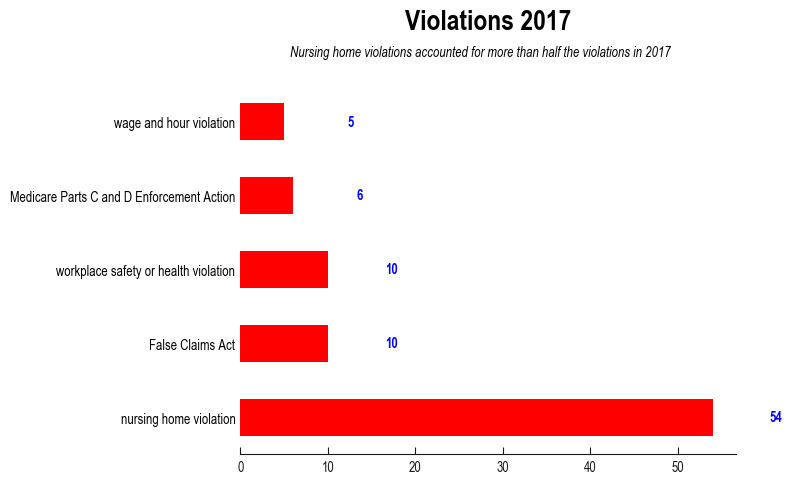

In [202]:
ax = Violations_2017['Primary Offense'].value_counts().head(5).plot(kind='barh' , color='red')

ax.grid()

ax.set_title("Violations 2017", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Nursing home violations accounted for more than half the violations in 2017", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width())))  
    x_pos = bar.get_width() + 8
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')



plt.savefig('Cumalative_Violations_2017.pdf')




In [198]:
Violations_2016['Primary Offense'].value_counts().head(5)

nursing home violation                       49
False Claims Act                             13
workplace safety or health violation         13
wage and hour violation                      11
Medicare Parts C and D Enforcement Action     7
Name: Primary Offense, dtype: int64

In [199]:
Violations_2016['Primary Offense'].value_counts().sum()

108

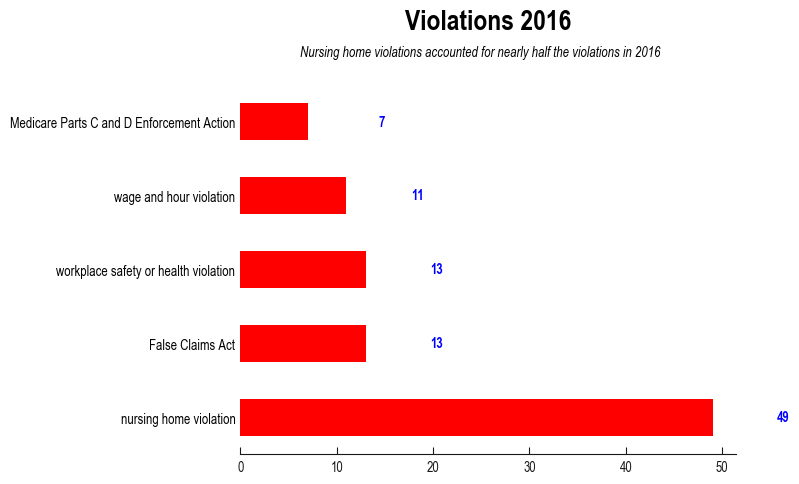

In [203]:
ax = Violations_2016['Primary Offense'].value_counts().head(5).plot(kind='barh' , color='red')

ax.grid()

ax.set_title("Violations 2016", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Nursing home violations accounted for nearly half the violations in 2016", ha='center', fontsize=10, fontstyle='italic')


for i, bar in enumerate(ax.patches):
    # print(i)
    value = str(int(round(bar.get_width())))  
    x_pos = bar.get_width() + 8
    y_pos = i
    # ax.text(x_pos, y_pos, value, verticalalignment='center')
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')



plt.savefig('Cumalative_Violations_2016.pdf')

plt.show()


Parent Company
ssm health                        52553
national healthcare corp.        160926
ensign group                     218054
kindred healthcare               263484
life care centers of america     801575
pruitthealth                     899737
signature healthcare            1071967
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64


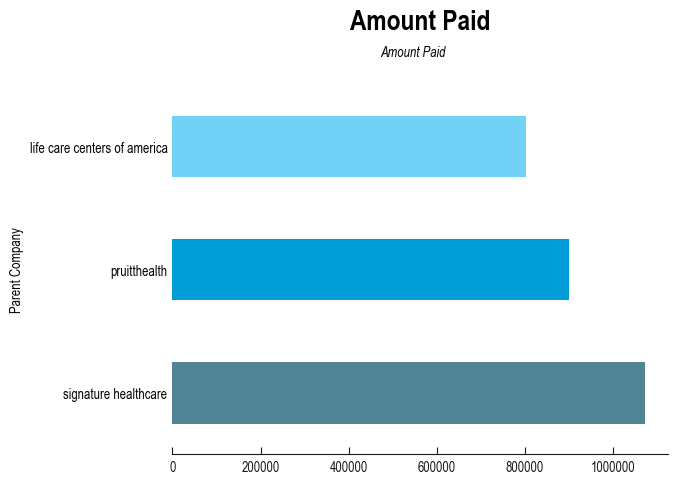

In [228]:
Nursing_Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().head(3).plot(kind='barh')



ax = Nursing_Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values(ascending=False).head(3).plot(kind='barh')


ax.grid()

ax.set_title("Amount Paid", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Amount Paid", ha='center', fontsize=10, fontstyle='italic')


# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width())))  
#     x_pos = bar.get_width() 
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')



plt.savefig('Amount_Paid_2016.pdf')

print(Nursing_Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values())

plt.show()



In [211]:
Nursing_Violations_2016

Company  \
50                       life care center of st louis   
51                      life care center of escondido   
52                life care center of the north shore   
54                      kindred hospital - louisville   
55  signature healthcare of south pittsburg rehab ...   
56      kindred nursing & rehabilitation-harborlights   
57                             pruitthealth- columbia   
58  signature healthcare at jackson manor rehab & ...   
59                         life care center of seneca   
60                 signature healthcare of fort wayne   
61                            nhc healthcare, dickson   
62                     nhc healthcare, town & country   
63                                   life care center   
64       kindred transitional care and rehab-columbus   
65                   life care center of copper basin   
66                           pruitthealth - covington   
67                          life care center of omaha   
68                     villages of jackson creek, the   
69                     signature healthcare of warren   
70                              pruitthealth - lanier   
71             signature healthcare of trimble county   
72                             pruitthealth - decatur   
73             signature healthcare at st peter villa   
74                            pruitthealth-walterboro   
75                  life care center of skagit valley   
76                     nhc healthcare, town & country   
77                                pruitthealth-durham   
78                 signature healthcare of georgetown   
79  signature healthcare of mccreary county rehab ...   
80               ssm health st clare meadows care ctr   
81  signature healthcare of rockwood rehab & wellness   
82                       pruitthealth - virginia park   
83            life care center of old hickory village   
84                             pruitthealth - lilburn   
85                             nhc healthcare, joplin   
86                       life care center of ooltewah   
87          signature healthcare of brookwood gardens   
88  signature healthcare of rockwood rehab & wellness   
89  signature healthcare at rockford rehab & wellness   
90   kindred transitional care and rehab - canyonwood   
91   kindred transitional care & rehabilitation-avery   
92                        life care center of andover   
93                            pruitthealth-orangeburg   
94                               pruitthealth - macon   
95                           lakewood healthcare, inc   
96                      pruitthealth - shepherd hills   
97                     life care ctr of lawrenceville   
98  signature healthcare at north hardin rehab & w...   

                  Parent Company  Penalty Amount  Subtraction From Penalty  \
50  life care centers of america            5146                         0   
51  life care centers of america            5363                         0   
52  life care centers of america            5515                         0   
54            kindred healthcare            6175                         0   
55          signature healthcare            7800                         0   
56            kindred healthcare            8190                         0   
57                  pruitthealth            8306                         0   
58          signature healthcare            8458                         0   
59  life care centers of america            8904                         0   
60          signature healthcare           10431                         0   
61     national healthcare corp.           10530                         0   
62     national healthcare corp.           11050                         0   
63  life care centers of america           12188                         0   
64            kindred healthcare           13252                         0   
65  life care centers of america           14430                         0   
66  

In [231]:
Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().median()

232690.0

In [232]:
Violations_2017.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().median()

284166.0

Parent Company
ssm health                        52553
national healthcare corp.        160926
ensign group                     218054
kindred healthcare               263484
life care centers of america     801575
pruitthealth                     899737
signature healthcare            1071967
Name: Penalty Amount Adjusted For Eliminating Multiple Counting, dtype: int64


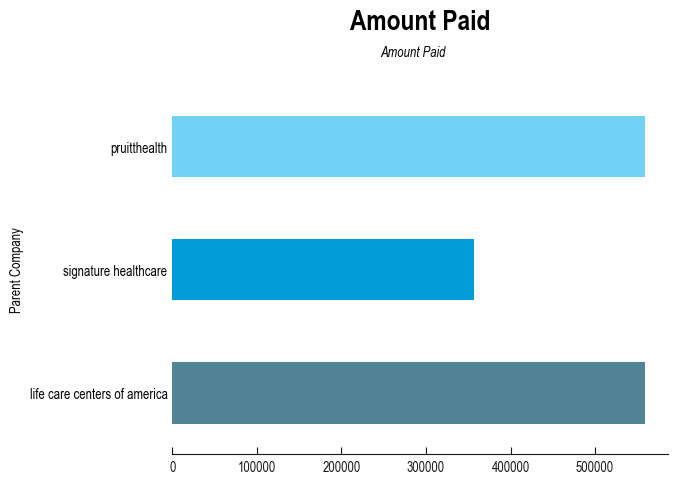

In [234]:
Nursing_Violations_2017.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().head(3).plot(kind='barh')



ax = Nursing_Violations_2017.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values(ascending=False).head(3).plot(kind='barh')


ax.grid()

ax.set_title("Amount Paid", pad=40, fontsize=20)
plt.gcf().text(0.5, 0.94, "Amount Paid", ha='center', fontsize=10, fontstyle='italic')


# for i, bar in enumerate(ax.patches):
#     # print(i)
#     value = str(int(round(bar.get_width())))  
#     x_pos = bar.get_width() 
#     y_pos = i
#     # ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='blue', fontweight='bold')



plt.savefig('Amount_Paid_2017.pdf')

print(Nursing_Violations_2016.groupby('Parent Company')['Penalty Amount Adjusted For Eliminating Multiple Counting'].sum().sort_values())

plt.show()

